# Time-Frequency Analysis Demo

In this demo, you’ll explore how bursts of delta, alpha, beta or gamma waves evolve over time and how the Short-Time Fourier Transform (STFT) allows us to visualize these changes in the time-frequency domain.

By adjusting parameters like burst duration, interburst time, and amplitude, you can observe how these settings affect both the time-domain signal and its time-frequency representation. Additionally, you can add Gaussian noise to simulate real-world conditions.

### Experiment with:
- **Burst Type and Parameters**: Choose between different frequencies ofbursts, and adjust their duration, interburst time, and amplitude.
- **Noise**: Add Gaussian noise to the signal and observe how it affects the time-frequency representation.
- **STFT Parameters**: Control the segment length and overlap of the STFT to modify the time and frequency resolution of the analysis.

The goal of this demo is to help you intuitively understand how signals with transient bursts of activity are represented in both the time and frequency domains.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from scipy.signal import stft

In [19]:


# Function to generate bursts of Delta or Beta waves with specified parameters and Gaussian noise
def generate_burst_signal_with_noise(burst_type='delta', burst_duration=0.2, interburst_time=1.0, amplitude=1, noise_std=0.5, sampling_rate=1000, total_duration=5):
    t = np.linspace(0, total_duration, int(sampling_rate * total_duration), endpoint=False)
    
    # Frequency for delta and beta bursts
    if burst_type == 'delta':
        f_burst = 2  # Delta waves at 2 Hz
    elif burst_type == 'alpha':
        f_burst = 10
    elif burst_type == 'beta':
        f_burst = 20  # Beta waves at 20 Hz
    elif burst_type == 'gamma':
        f_burst = 40
    else:
        ValueError("Unknown Burst Type")
    
    # Create bursts
    signal = np.zeros_like(t)
    burst_samples = int(sampling_rate * burst_duration)
    interburst_samples = int(sampling_rate * interburst_time)
    
    current_sample = 0
    while current_sample + burst_samples <= len(t):
        burst = amplitude * np.sin(2 * np.pi * f_burst * t[current_sample:current_sample+burst_samples])
        signal[current_sample:current_sample+burst_samples] += burst
        current_sample += burst_samples + interburst_samples
    
    # Add baseline Gaussian noise (with specified standard deviation)
    noise = np.random.normal(0, noise_std, len(t))  # Gaussian noise
    signal += noise  # Add noise to the signal
    
    return t, signal, noise

# Function to compute the STFT and return time-frequency representation
def compute_stft(signal, sampling_rate, nperseg, noverlap):
    if noverlap >= nperseg:
        print(f"Setting noverlap from {noverlap} to {nperseg}")
        noverlap = nperseg -1
    f, t, Zxx = stft(signal, fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)
    # Limit the frequency axis to 50 Hz
    f = f[f <= 50]  # Only include frequencies up to 50 Hz
    Zxx = Zxx[:len(f), :]  # Slice Zxx to match the new frequency axis
    return f, t, np.abs(Zxx)

# Interactive plot function for time-frequency analysis
def plot_tf_analysis_with_noise(burst_type='delta', burst_duration=0.2, interburst_time=1.0,
                                amplitude=1, noise_std=0.5,total_duration=5, nperseg=256, noverlap=128):
    # Generate burst signal with noise
    sampling_rate = 250
    t, signal, noise = generate_burst_signal_with_noise(burst_type, burst_duration, interburst_time, amplitude, noise_std, sampling_rate, total_duration)
    # Compute the STFT
    f, t_stft, Zxx = compute_stft(signal, sampling_rate, nperseg, noverlap)
    
    # Create plots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the time-domain signal
    axs[0].plot(t, signal, label=f"{burst_type.capitalize()} Bursts + Gaussian Noise")
    axs[0].set_title("Time Domain Signal")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)
    
    # Plot the Time-Frequency Representation (STFT)
    im = axs[1].pcolormesh(t_stft, f, np.log(Zxx), shading='auto')
    fig.colorbar(im, ax=axs[1])
    axs[1].set_title("Time-Frequency Representation (STFT)")
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylabel("Frequency [Hz]")
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets for burst parameters, noise level, and TF analysis
interactive_plot = interactive(
    plot_tf_analysis_with_noise,
    burst_type=widgets.Dropdown(value='beta', options=['delta', 'alpha', 'beta', 'gamma'], description='Burst Type:'),
    burst_duration=widgets.FloatSlider(value=0.2, min=0.1, max=1.0, step=0.1, description='Burst Duration (s):'),
    interburst_time=widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Interburst Time (s):'),
    amplitude=widgets.FloatSlider(value=1, min=0, max=3, step=0.05, description='Amplitude:'),
    noise_std=widgets.FloatSlider(value=0.01, min=0.01, max=2, step=0.1, description='Noise lvl:'),
    total_duration=widgets.FloatSlider(value=5, min=1, max=20, step=0.5, description='Duration (s):'),
    nperseg=widgets.IntSlider(value=256, min=32, max=1024, step=32, description='STFT Window Size:'),
    noverlap=widgets.IntSlider(value=128, min=32, max=1024, step=32, description='STFT Overlap:')
)

# Display the interactive plot
interactive_plot


interactive(children=(Dropdown(description='Burst Type:', index=2, options=('delta', 'alpha', 'beta', 'gamma')…

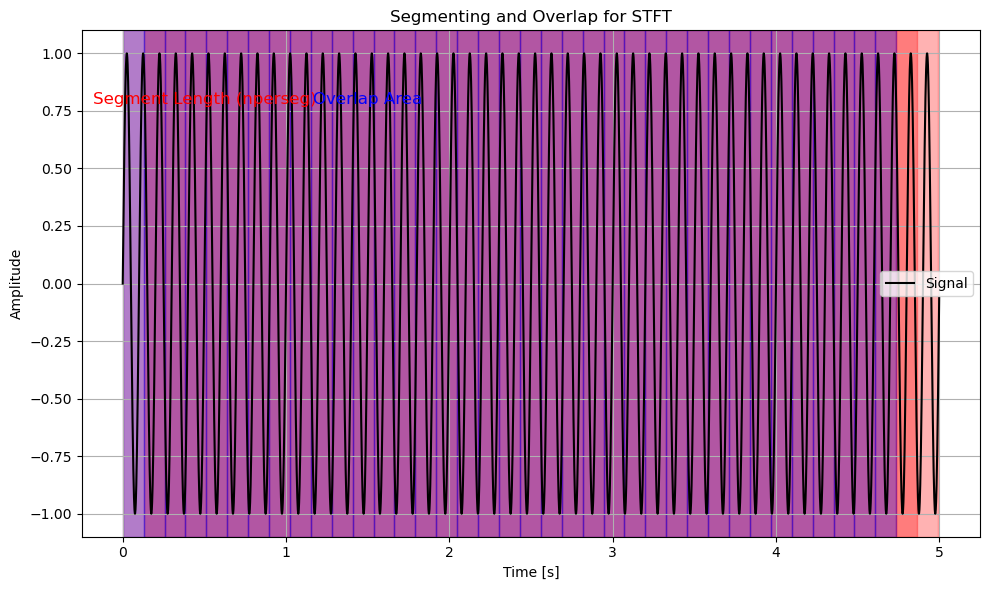

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Hz
total_duration = 5  # seconds
signal_frequency = 10  # Hz (for a simple sine wave)
nperseg = 256  # Segment length for STFT
noverlap = 128  # Overlap between segments

# Generate a simple sine wave signal (for example, a 10 Hz sine wave)
t = np.linspace(0, total_duration, int(sampling_rate * total_duration), endpoint=False)
signal = np.sin(2 * np.pi * signal_frequency * t)

# Compute segment indices for visualization
segment_indices = []
for start in range(0, len(t) - nperseg, nperseg - noverlap):
    segment_indices.append((start, start + nperseg))

# Plot the time-domain signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Signal', color='black')

# Add rectangles to show the segmenting
for start, end in segment_indices:
    plt.axvspan(t[start], t[end], color='red', alpha=0.3)  # Highlight the segment range

# Highlight overlap areas
for start, end in segment_indices[1:]:
    plt.axvspan(t[start - noverlap], t[start], color='blue', alpha=0.3)  # Highlight the overlap range

# Annotations for clarity
plt.text(0.5, 0.8, "Segment Length (nperseg)", horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
plt.text(1.5, 0.8, "Overlap Area", horizontalalignment='center', verticalalignment='center', fontsize=12, color='blue')

plt.title('Segmenting and Overlap for STFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
